# coding: utf-8

# # Automatic Ticket Assignment - Capstone Project 
# 
# ## Problem Statement - 
# 
# In most of the IT organizations, the assignment of incidents to appropriate IT groups is still a manual process. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. 
# 
# _<font color=blue>This capstone project intends to reduce the manual intervention of IT operations or Service desk teams by automating the ticket assignment process.The goal here is to create a text classification based ML model that can automatically  classify any new tickets by analysing ticket description to one of the relevant Assignment groups, which could be later integrated to any ITSM tool like Service Now. Based on the ticket description our model will output the probability of assigning it to one of the 74 Groups.</font>_
# 
# The solution would be implemented using below approach:
# - Approach 1 - Using a traditional machine learning algorithm we would be classifying the tickets into one of the groups having more than 100 tickets.
# - Approach 2 - Firstly the ticket would be classified into L1/L2 or L3 classes and then it would be further classified into one of the given assignment groups.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
# ### A quick look at our data and inspect

# #### Read the data using pandas read_excel

In [3]:
df = pd.read_excel("../dataset/input_data.xlsx", encoding='utf-8')


In [4]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
# #### Shape of the data


In [6]:
df.shape

(8500, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
# ### Observation:
# 
# - There are 4 columns and all are string columns
# - There are totally 8500 rows and there seems to be mising values in Short description and Description columns, which needs to be looked into and handled
# - Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
# - Assignment group is our predictor / target column with multiple classes. 
# - This is a Multiclass Classification problem 
# ### Lets drop Caller column as its does not seems to contribute in predicting the target


In [9]:
df_incidents = df.drop('Caller', axis=1)
# ### Lets see the number of classes in the Assignment group


In [10]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [11]:
len(df_incidents['Assignment group'].unique())

74

In [12]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()

In [13]:
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


In [14]:
# ### Lets visualize the percentage of incidents per assignment group
# Plot to visualize the percentage data distribution across different groups


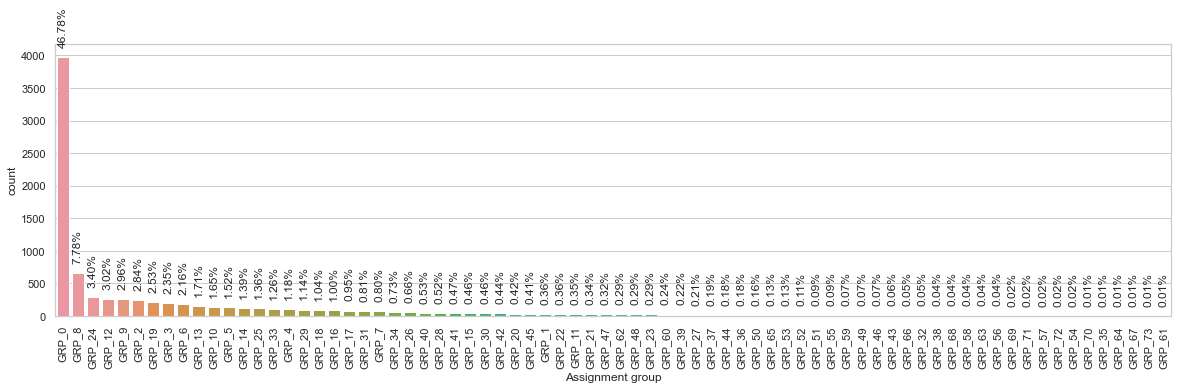

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')



In [29]:
# ### Observation
# - This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
# - There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2  incidents, need to see if we can drop those rows due to the lack of samples representing those classes. They might not be of much help as a predictor


In [30]:
df_incidents.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [32]:
df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


In [33]:
df_top_20=df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

Rectangle(xy=(-0.4, 0), width=0.8, height=3976, angle=0)
3976
Rectangle(xy=(0.6, 0), width=0.8, height=661, angle=0)
661
Rectangle(xy=(1.6, 0), width=0.8, height=289, angle=0)
289
Rectangle(xy=(2.6, 0), width=0.8, height=257, angle=0)
257
Rectangle(xy=(3.6, 0), width=0.8, height=252, angle=0)
252
Rectangle(xy=(4.6, 0), width=0.8, height=241, angle=0)
241
Rectangle(xy=(5.6, 0), width=0.8, height=215, angle=0)
215
Rectangle(xy=(6.6, 0), width=0.8, height=200, angle=0)
200
Rectangle(xy=(7.6, 0), width=0.8, height=184, angle=0)
184
Rectangle(xy=(8.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(9.6, 0), width=0.8, height=140, angle=0)
140
Rectangle(xy=(10.6, 0), width=0.8, height=129, angle=0)
129
Rectangle(xy=(11.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(12.6, 0), width=0.8, height=116, angle=0)
116
Rectangle(xy=(13.6, 0), width=0.8, height=107, angle=0)
107
Rectangle(xy=(14.6, 0), width=0.8, height=100, angle=0)
100
Rectangle(xy=(15.6, 0), width=0.8, height=97, an

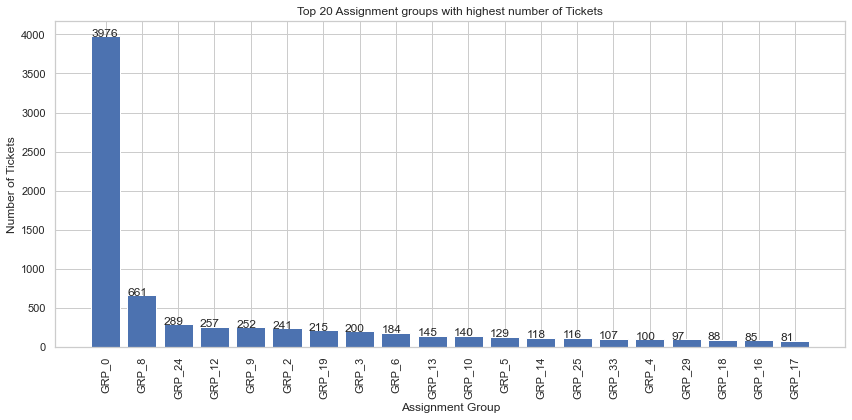

In [50]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel("Assignment Group")
plt.xticks(rotation=90)
plt.ylabel("Number of Tickets")

for bar in bars:
    print(bar)
    yval=bar.get_height()
    print(yval)
    plt.text(bar.get_x(), yval + .005 , yval)
    
plt.tight_layout()
plt.show()
